In [1]:
using Plots

function cdot(b, μ, β, γ, t, c, w, r)
    
    return b - c * ( β + b - μ)
end

cdot (generic function with 1 method)

In [2]:
function wdot(b, μ, β, γ, t, c, w, r)
    
    return c * β - w * (γ + b - μ)
end

wdot (generic function with 1 method)

In [3]:
function rdot(b, μ, β, γ, t, c, w, r)
    
    return w * γ - r * (b - μ) - μ
end

rdot (generic function with 1 method)

In [4]:
function Ct(b, μ, β, γ, t, c, w, r)
    
    return b / (-μ + b + β) + (c0 + b / (μ - b - β)) * ℯ^((μ - b - β) * t)
end

Ct (generic function with 1 method)

In [5]:
function Wt(b, μ, β, γ, t, c, w, r)
    
    return (b*β) / ((β + b - μ)*(γ + b - μ)) + ((β / (γ - β)) * (c0 + b / (μ - b - β))) * ℯ^((μ - b - β) * t) + (w0 - (c0 * β) / (γ - β) - (b*β) / ((μ - b - γ) * (γ - β))) * ℯ^((μ - b - γ) * t)
end

Wt (generic function with 1 method)

In [6]:
function Rt(b, μ, β, γ, t, c, w, r)
    
    return (μ^2 - μ*b - μ*γ - μ*β + β*γ) / ((μ - b - β) * (μ - b - γ)) - (γ / (γ - β)) * (c0 + b / (μ - b - β)) * ℯ^((μ - b - β) * t) - (w0 - (c0 * β) / (γ - β) - (b*β) / ((μ - b - γ) * (γ - β))) * ℯ^((μ - b - γ) * t) + (c0 + w0 + r0 - 1) * ℯ^((μ - b) * t)
    
end


Rt (generic function with 1 method)

In [7]:
function Analytical(b::Number, μ::Number, β::Number, γ::Number, t0::Number, c0::Number, w0::Number, r0::Number, h::Number, n::Number, showPlot = false, mode = 0, shortened = false)
    
    T = []
    C = []
    W = []
    R = []
    
    t = t0
    
    if shortened
    
        for k in 1:n
            
            c = Ct(b, μ, β, γ, t, c0, 0, 0)
            push!(C, c)
            
            t += h
            
        end
    
    else 
        
        for k in 1:n

            c = Ct(b, μ, β, γ, t, c0, w0, r0)
            w = Wt(b, μ, β, γ, t, c0, w0, r0)
            r = Rt(b, μ, β, γ, t, c0, w0, r0)

            push!(T, t)
            push!(C, c)
            push!(W, w)
            push!(R, r)

            t += h
        end
    end
    
    if showPlot
        
        if mode == 0

            plot(T, C, color=:red, label="Children")

        elseif mode == 1

            plot(T, C, color=:red, label="Children", title = "γ = $γ")
            
        else

            plot(T, C, color=:red, label="Children", title = "β = $β")
        end
        
        plot!(T, W, color=:green, label="Workers")
        plt = plot!(T, R, color=:blue, label="Retirees")

        return plt
        
    else
        
    return T, C, W, R
        
    end

    
end

Analytical (generic function with 4 methods)

In [8]:
function Euler(b::Number, μ::Number, β::Number, γ::Number, t0::Number, c0::Number, w0::Number, r0::Number, h::Number, n::Number, showPlot = false, mode = 0, shortened = false)
    
    T = zeros(n, 1)
    C = zeros(n, 1)
    W = zeros(n, 1)
    R = zeros(n, 1)
    
    T[1] = t0
    C[1] = c0
    W[1] = w0
    R[1] = r0
    
    if shortened
    
        for t in 1:n-1
            
            Kc1 = cdot(b, μ, β, γ, T[t],C[t],0,0)
            
            C[t+1]=C[t] + h * Kc1
            T[t+1]=T[t] + h
            
        end
    
    else
        
        for t in 1:n-1

            Kc1 = cdot(b, μ, β, γ, T[t],C[t],W[t],R[t])
            Kw1 = wdot(b, μ, β, γ, T[t],C[t],W[t],R[t])
            Kr1 = rdot(b, μ, β, γ, T[t],C[t],W[t],R[t])

            C[t+1]=C[t] + h * Kc1
            W[t+1]=W[t] + h * Kw1
            R[t+1]=R[t] + h * Kr1
            T[t+1]=T[t] + h
            
        end
    end
    
        
    if showPlot
        
        plot(T, C, color=:red, label="Children", title="γ = $γ")
        plot!(T, W, color=:green, label="Workers")
        plt = plot!(T, R, color=:blue, label="Retirees")
    
    return plt
    
    else
    
    return T, C, W, R
        
    end
    
end

Euler (generic function with 4 methods)

In [9]:
function Runge_Kutte4(b::Number, μ::Number, β::Number, γ::Number, t0::Number, c0::Number, w0::Number, r0::Number, h::Number, n::Number, showPlot = false, mode = 0, shortened = false)

    T = zeros(n, 1)
    C = zeros(n, 1)
    W = zeros(n, 1)
    R = zeros(n, 1)
    
    T[1] = t0
    C[1] = c0
    W[1] = w0
    R[1] = r0
    
    if shortened
    
        for t in 1:n-1
        
       
            
            Kc1=cdot(b, μ, β, γ, T[t],C[t],0,0)
            Kc2=cdot(b, μ, β, γ, T[t]+h/2,C[t]+(h/2)*Kc1,0,0)
            Kc3=cdot(b, μ, β, γ, T[t]+h/2,C[t]+(h/2)*Kc2,0,0)
            Kc4=cdot(b, μ, β, γ, T[t]+h,C[t]+h*Kc3,0,0)

            C[t+1]=C[t]+(h/6)*(Kc1+2*Kc2+2*Kc3+Kc4)
            T[t+1]=T[t]+h
        end  
    else
            
        for t in 1:n-1
            
            Kc1=cdot(b, μ, β, γ, T[t],C[t],W[t],R[t])
            Kw1=wdot(b, μ, β, γ, T[t],C[t],W[t],R[t])
            Kr1=rdot(b, μ, β, γ, T[t],C[t],W[t],R[t])

            Kc2=cdot(b, μ, β, γ, T[t]+h/2,C[t]+(h/2)*Kc1,W[t]+(h/2)*Kw1,R[t]+(h/2)*Kr1)
            Kw2=wdot(b, μ, β, γ, T[t]+h/2,C[t]+(h/2)*Kc1,W[t]+(h/2)*Kw1,R[t]+(h/2)*Kr1)
            Kr2=rdot(b, μ, β, γ, T[t]+h/2,C[t]+(h/2)*Kc1,W[t]+(h/2)*Kw1,R[t]+(h/2)*Kr1)

            Kc3=cdot(b, μ, β, γ, T[t]+h/2,C[t]+(h/2)*Kc2,W[t]+(h/2)*Kw2,R[t]+(h/2)*Kr2)
            Kw3=wdot(b, μ, β, γ, T[t]+h/2,C[t]+(h/2)*Kc2,W[t]+(h/2)*Kw2,R[t]+(h/2)*Kr2)
            Kr3=rdot(b, μ, β, γ, T[t]+h/2,C[t]+(h/2)*Kc2,W[t]+(h/2)*Kw2,R[t]+(h/2)*Kr2)

            Kc4=cdot(b, μ, β, γ, T[t]+h,C[t]+h*Kc3,W[t]+h*Kw3,R[t]+h*Kr3)
            Kw4=wdot(b, μ, β, γ, T[t]+h,C[t]+h*Kc3,W[t]+h*Kw3,R[t]+h*Kr3)
            Kr4=rdot(b, μ, β, γ, T[t]+h,C[t]+h*Kc3,W[t]+h*Kw3,R[t]+h*Kr3)

            C[t+1]=C[t]+(h/6)*(Kc1+2*Kc2+2*Kc3+Kc4)
            W[t+1]=W[t]+(h/6)*(Kw1+2*Kw2+2*Kw3+Kw4)
            R[t+1]=R[t]+(h/6)*(Kr1+2*Kr2+2*Kr3+Kr4)
            T[t+1]=T[t]+h
        end
    end
    
    if showPlot
        
        plot(T, C, color=:red, label="Children")
        plot!(T, W, color=:green, label="Workers")
        plt = plot!(T, R, color=:blue, label="Retirees")
    
    return plt
    
    else
    
    return T, C, W, R
        
    end
    
end

Runge_Kutte4 (generic function with 4 methods)

In [19]:
function comparison(b::Number, μ::Number, β::Number, γ::Number, t0::Number, c0::Number, w0::Number, r0::Number, h::Number, n::Number)
    
    A = Analytical(b, μ, β, γ, t0, c0, w0, r0, h, n)
    B = Euler(b, μ, β, γ, t0, c0, w0, r0, h, n)
    C = Runge_Kutte4(b, μ, β, γ, t0, c0, w0, r0, h, n)
    
    Args = A[1]
    A_E_diff = [[], [], []]
    A_RK_diff = [[], [], []]
    
    for i in 2:4
        for (a, b, c) in zip(A[i], B[i], C[i])
                    
            push!(A_E_diff[i-1], (abs(a-b))*10000/a)
            push!(A_RK_diff[i-1], (abs(a-c))*10000/a)

        end
    end
    
    plot(Args, A_E_diff[1], color=:red,linestyle=:dot, label="Euler Children", xlabel = "time t (years)", ylabel = "relative error (%)")
    plot!(Args, A_RK_diff[1], color=:red,linestyle=:dash, label="RK4 Children")
    plot!(Args, A_E_diff[2], color=:green,linestyle=:dot, label="Euler Workers")
    plot!(Args, A_RK_diff[2], color=:green,linestyle=:dash, label="RK4 Workers")
    plot!(Args, A_E_diff[3], color=:blue,linestyle=:dot, label="Euler Retirees")
    plt = plot!(Args, A_RK_diff[3], color=:blue,linestyle=:dash, label="RK4 Retirees")
    
    return plt
end


comparison (generic function with 1 method)

In [13]:
function order_comparison(b::Number, μ::Number, β::Number, γ::Number, t0::Number, c0::Number, w0::Number, r0::Number)
    
    Args = [round(2/(10*k), digits = 6) for k in 1:100]
    Values_Euler = []
    Values_RK4 = []
    
    for h in Args
        n = Int(round(100 / h))
        A = Analytical(b, μ, β, γ, t0, c0, w0, r0, h, n, false, true)[2]
        B = Euler(b, μ, β, γ, t0, c0, w0, r0, h, n, false, true)[2]
        C = Runge_Kutte4(b, μ, β, γ, t0, c0, w0, r0, h, n, false, true)[2]
        Temp_Euler = 0
        Temp_RK4 = 0
                
        for (a, b, c) in zip(A, B, C)
            e_check = (100*abs(a-b))/a
            if e_check > Temp_Euler
                Temp_Euler = e_check
            end
            rk_check = (100*abs(a-c))/a
            if rk_check > Temp_RK4
                Temp_RK4 = rk_check
            end
            
            
        
        end
        
        push!(Values_Euler, Temp_Euler)
        push!(Values_RK4, Temp_RK4)
    end
    plot(Args, Values_Euler, color=:red, label = "Euler", xlabel = "step h", ylabel = "relative error (%)")
    plt = plot!(Args, Values_RK4, color=:blue, label = "RK4")
    return plt
end

order_comparison (generic function with 1 method)

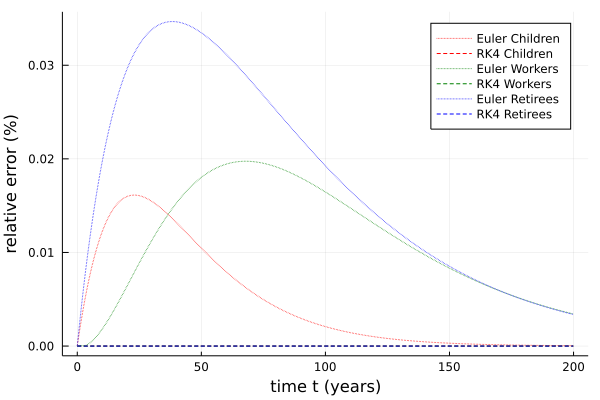

In [14]:
b = 0.00967
μ = 0.00864
β = 1/22
γ = 1/43

t0=0
c0=0.25
w0=0.6
r0=0.15

comparison(b, μ, β, γ, t0, c0, w0, r0, 0.1, 2000)

┌ Info: Saved animation to 
│   fn = C:\Users\Adamek\tmp.gif
└ @ Plots C:\Users\Adamek\.julia\packages\Plots\lzHOt\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\Adamek\\tmp.gif")
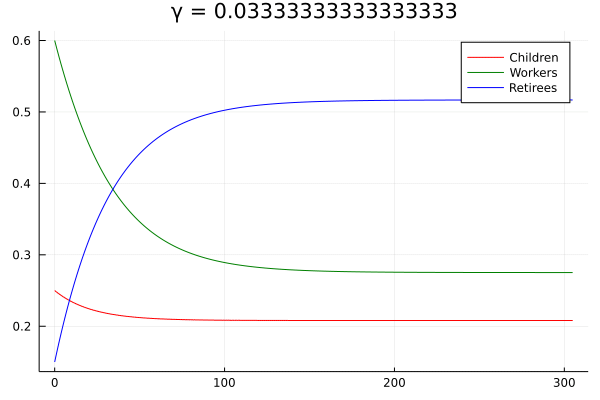

In [13]:
b = 0.00967
μ = 0.00864
β = 1/22

t0=0
c0=0.25
w0=0.6
r0=0.15

Pars = [1/k for k in 30:0.25:50]

anim = @animate for parameter in Pars

    Analytical(b, μ, β, parameter, t0, c0, w0, r0, 0.1, 3050, true, 1)
end
gif(anim, fps = 15)

┌ Info: Saved animation to 
│   fn = C:\Users\Adamek\tmp.gif
└ @ Plots C:\Users\Adamek\.julia\packages\Plots\lzHOt\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\Adamek\\tmp.gif")
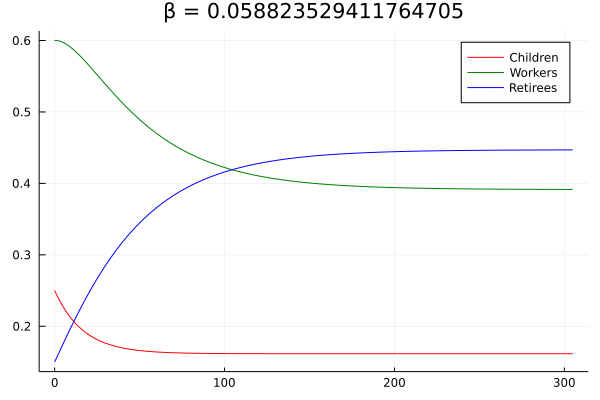

In [14]:
b = 0.00967
μ = 0.00864
β = 1/22
γ = 1/43

t0=0
c0=0.25
w0=0.6
r0=0.15

Pars = [1/k for k in 17:0.25:25]

anim = @animate for parameter in Pars

    Analytical(b, μ, parameter, γ, t0, c0, w0, r0, 0.1, 3050, true, 3)
end
gif(anim, fps = 10)

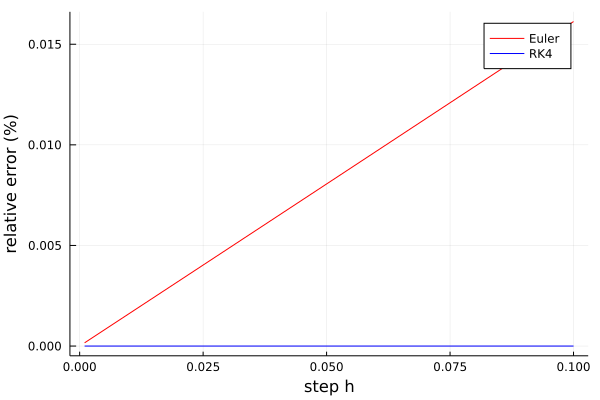

In [12]:
b = 0.00967
μ = 0.00864
β = 1/22
γ = 1/43

t0=0
c0=0.25
w0=0.6
r0=0.15

mode = 2
order_comparison(b, μ, β, γ, t0, c0, w0, r0)